In [2]:
import torch
import torchvision.models as models

In [3]:
# Crie uma instância do modelo com a mesma arquitetura que você treinou
model_conv = models.resnet18()  # Substitua 'resnet18()' pela arquitetura que você usou originalmente

# Carregue os pesos salvos para o modelo
model_conv.load_state_dict(torch.load('C:/Users/flora/OneDrive/Documentos/MESTRADO_UFSC/rotinas/python/teste_Modelos/transfer_learning/model_conv.pth'))

# Coloque o modelo em modo de avaliação (não treinamento)
model_conv.eval()

RuntimeError: Error(s) in loading state_dict for ResNet:
	size mismatch for fc.weight: copying a param with shape torch.Size([2, 512]) from checkpoint, the shape in current model is torch.Size([1000, 512]).
	size mismatch for fc.bias: copying a param with shape torch.Size([2]) from checkpoint, the shape in current model is torch.Size([1000]).

In [18]:
import torch
from torchvision import transforms
from torchvision import models
from torchvision import datasets
import os
import numpy as np

model_conv = models.resnet18(pretrained=False)
num_ftrs = model_conv.fc.in_features
model_conv.fc = torch.nn.Linear(num_ftrs, 2)

# Carregue os pesos salvos para o modelo
model_conv.load_state_dict(torch.load('C:/Users/flora/OneDrive/Documentos/MESTRADO_UFSC/rotinas/python/teste_Modelos/transfer_learning/model_conv.pth'))

# Coloque o modelo em modo de avaliação (não treinamento)
model_conv.eval()

# Função para mostrar a imagem
def imshow(inp, title=None):
    """Imshow para Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

# Função para visualizar as previsões do modelo
def visualize_model_predictions(model, img_path):
    was_training = model.training
    model.eval()

    img = Image.open(img_path)
    img = data_transforms['val'](img)
    img = img.unsqueeze(0)
    img = img.to(device)

    with torch.no_grad():
        outputs = model(img)
        _, preds = torch.max(outputs, 1)

        ax = plt.subplot(2, 2, 1)
        ax.axis('off')
        ax.set_title(f'Predicted: {class_names[preds[0]]}')
        imshow(img.cpu().data[0])
        
    model.train(mode=was_training)


C:\Users\flora\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\flora\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [19]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = 'C:/Users/flora/OneDrive/Documentos/MESTRADO_UFSC/rotinas/python/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

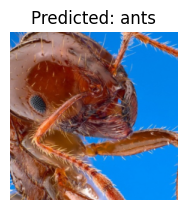

In [27]:

# Substitua 'seu_modulo_modelo' pelo nome do arquivo/module onde a classe do seu modelo está definida
# Substitua 'SeuModelo' pela classe real do seu modelo

# Use a função para visualizar as previsões do modelo em uma imagem específica
visualize_model_predictions(model_conv,'C:/Users/flora/OneDrive/Documentos/MESTRADO_UFSC/rotinas/python/hymenoptera_test/03.jpg')

# Mostrar a figura
plt.show()
